In [1]:
!pip install beautifulsoup4

   ---------------------------------------- 0.0/147.9 kB ? eta -:--:--
   -- ------------------------------------- 10.2/147.9 kB ? eta -:--:--
   -- ------------------------------------- 10.2/147.9 kB ? eta -:--:--
   -------- ------------------------------ 30.7/147.9 kB 187.9 kB/s eta 0:00:01
   ---------- ---------------------------- 41.0/147.9 kB 164.3 kB/s eta 0:00:01
   ---------------- ---------------------- 61.4/147.9 kB 218.8 kB/s eta 0:00:01
   ------------------------ -------------- 92.2/147.9 kB 291.5 kB/s eta 0:00:01
   ---------------------------------- --- 133.1/147.9 kB 374.6 kB/s eta 0:00:01
   -------------------------------------- 147.9/147.9 kB 383.5 kB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import os
import json
import time
import random
import zipfile
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Class Explanation: `NewsScraper`

## Overview
The `NewsScraper` class is designed for scraping news articles from three different Urdu news websites: Geo, Jang, and Express. The class has methods that cater to each site's unique structure and requirements. Below, we will go through the class and its methods, detailing what each function does, the input it takes, and the output it returns.

## Class Definition

```python
class NewsScraper:
    def __init__(self, id_=0):
        self.id = id_
```


## Method 1: `get_express_articles`

### Description
Scrapes news articles from the Express website across categories like saqafat (entertainment), business, sports, science-technology, and world. The method navigates through multiple pages for each category to gather a more extensive dataset.

### Input
- **`max_pages`**: The number of pages to scrape for each category (default is 7).

### Process
- Iterates over each category and page.
- Requests each category page and finds article cards within `<ul class='tedit-shortnews listing-page'>`.
- Extracts the article's headline, link, and content by navigating through `<div class='horiz-news3-caption'>` and `<span class='story-text'>`.

### Output
- **Returns**: A tuple of:
  - A Pandas DataFrame containing columns: `id`, `title`, and `link`).
  - A dictionary `express_contents` where the key is the article ID and the value is the article content.

### Data Structure
- Article cards are identified by `<li>` tags.
- Content is structured within `<span class='story-text'>` and `<p>` tags.



In [6]:
# class NewsScraper:
#     def __init__(self,id_=0):
#         self.id = id_


#   # write functions to scrape from other websites


#     def get_express_articles(self, max_pages=3):
#         express_df = {
#             "id": [],
#             "title": [],
#             "link": [],
#             "content": [],
#             "gold_label": [],
#         }
#         base_url = 'https://www.express.pk'
#         categories = ['saqafat', 'business', 'sports', 'science', 'world']   # saqafat is entertainment category

#         # Iterating over the specified number of pages
#         for category in categories:
#             for page in range(1, max_pages + 1):
#                 print(f"Scraping page {page} of category '{category}'...")
#                 url = f"{base_url}/{category}/archives?page={page}"
#                 response = requests.get(url)
#                 response.raise_for_status()
#                 soup = BeautifulSoup(response.text, "html.parser")

#                 # Finding article cards
#                 cards = soup.find('ul', class_='tedit-shortnews listing-page').find_all('li')  # Adjust class as per actual site structure
#                 print(f"\t--> Found {len(cards)} articles on page {page} of '{category}'.")

#                 success_count = 0

#                 for card in cards:
#                     try:
#                         div = card.find('div',class_='horiz-news3-caption')

#                         # Article Title
#                         headline = div.find('a').get_text(strip=True).replace('\xa0', ' ')

#                         # Article link
#                         link = div.find('a')['href']

#                         # Requesting the content from each article's link
#                         article_response = requests.get(link)
#                         article_response.raise_for_status()
#                         content_soup = BeautifulSoup(article_response.text, "html.parser")


#                         # Content arranged in paras inside <span> tags
#                         paras = content_soup.find('span',class_='story-text').find_all('p')

#                         combined_text = " ".join(
#                         p.get_text(strip=True).replace('\xa0', ' ').replace('\u200b', '')
#                         for p in paras if p.get_text(strip=True)
#                         )

#                         # Storing data
#                         express_df['id'].append(self.id)
#                         express_df['title'].append(headline)
#                         express_df['link'].append(link)
#                         express_df['gold_label'].append(category.replace('saqafat','entertainment').replace('science','science-technology'))
#                         express_df['content'].append(combined_text)

#                         # Increment ID and success count
#                         self.id += 1
#                         success_count += 1

#                     except Exception as e:
#                         print(f"\t--> Failed to scrape an article on page {page} of '{category}': {e}")

#                 print(f"\t--> Successfully scraped {success_count} articles from page {page} of '{category}'.")
#             print('')

#         return pd.DataFrame(express_df)


#         # Function to scrape content from individual article pages
#     def scrape_content(self, article_url):
#         try:
#             # Send a GET request to the article page
#             response = requests.get(article_url)
#             response.encoding = 'utf-8'

#             # Parse the page content
#             soup = BeautifulSoup(response.text, 'html.parser')

#             # Find all <p> tags and extract their text
#             paragraphs = soup.find_all('p')
#             content = "\n".join([p.get_text(strip=True) for p in paragraphs if p.get_text(strip=True)])  # Join all paragraphs into one string

#             # Remove all English content (i.e., text that contains only English characters)
#             content = self.remove_english_text(content)

#             return content
#         except Exception as e:
#             print(f"Error scraping content from {article_url}: {e}")
#             return ""  # Return empty content in case of an error

#     # Function to remove English content from the text
#     def remove_english_text(self, text):
#         # Remove text that contains only English characters (ignoring other scripts like Urdu)
#         # This regex will remove anything with a Latin alphabet, numbers, and common punctuations
#         cleaned_text = re.sub(r'[A-Za-z0-9,.\-!"?;:(){}\[\]<>%&@#$^_+=*|\\/`~]', '', text)
#         # Optionally, remove leading/trailing whitespace
#         return cleaned_text.strip()

#     # Method to scrape news from different categories
#     def get_dunya_articles(self):
#         # Initialize the dictionary to store the data
#         dunya_df = {
#             "id": [],
#             "title": [],
#             "link": [],
#             "content": [],
#             "gold_label": [],
#         }

#         counter = self.id  # Start the counter from the provided id value

#         # Define the categories and URLs directly within the function
#         categories = [
#             ("Entertainment", "https://urdu.dunyanews.tv/index.php/ur/Entertainment"),
#             ("Business", "https://urdu.dunyanews.tv/index.php/ur/Business"),
#             ("Sports", "https://urdu.dunyanews.tv/index.php/ur/Sports"),
#             ("World", "https://urdu.dunyanews.tv/index.php/ur/World"),
#             ("Crime", "https://urdu.dunyanews.tv/index.php/ur/Crime")
#         ]

#         # Loop through the categories and scrape data
#         for gold_label, base_url in categories:
#             page_num = 1  # Start with page 1
#             max_pages = 10  # Limit to 10 pages for each category

#             print(f"Scraping category: {gold_label}")

#             # Loop through pages for the current category
#             while page_num <= max_pages:
#                 print(f"Scraping page {page_num} of {gold_label}...")

#                 # Construct the URL for the current page
#                 url = f"{base_url}?page={page_num}"

#                 # Send a GET request to the page
#                 response = requests.get(url)
#                 response.encoding = 'utf-8'  # Ensure proper encoding

#                 # Parse the page content
#                 soup = BeautifulSoup(response.text, 'html.parser')

#                 # Find all <a> tags containing links and titles
#                 articles_found = False
#                 for a_tag in soup.find_all('a', href=True):
#                     relative_link = a_tag['href']
#                     title = a_tag.get_text(strip=True)

#                     # Store link and title if they meet your criteria (category-specific)
#                     if f'/ur/{gold_label}/' in relative_link and title:
#                         # Prepend base URL to href
#                         full_url = "https://urdu.dunyanews.tv" + relative_link
#                         dunya_df["link"].append(full_url)
#                         dunya_df["title"].append(title)

#                         # Append the appropriate gold_label for the current category
#                         dunya_df["gold_label"].append(gold_label)

#                         # Scrape content from the article page
#                         content = self.scrape_content(full_url)

#                         # Append id and content to respective lists
#                         dunya_df["id"].append(counter)
#                         dunya_df["content"].append(content)
#                         counter += 1
#                         articles_found = True

#                 # If no articles were found, break out of the loop (end of pagination)
#                 if not articles_found:
#                     print(f"No articles found on page {page_num} of {gold_label}, stopping...")
#                     break

#                 # Go to the next page
#                 print(f"Finished scraping page {page_num} of {gold_label}. Moving to the next page.")
#                 page_num += 1

#         # Return the DataFrame created from the dictionary
#         return pd.DataFrame(dunya_df)

import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

class NewsScraper:
    def __init__(self, id_=0):
        self.id = id_

    # Function to scrape content from individual article pages
    def scrape_content(self, article_url):
        try:
            # Send a GET request to the article page
            response = requests.get(article_url)
            response.encoding = 'utf-8'

            # Parse the page content
            soup = BeautifulSoup(response.text, 'html.parser')

            # Find all <p> tags and extract their text
            paragraphs = soup.find_all('p')
            content = "\n".join([p.get_text(strip=True) for p in paragraphs if p.get_text(strip=True)])  # Join all paragraphs into one string

            # Remove all English content (i.e., text that contains only English characters)
            content = self.remove_english_text(content)

            return content
        except Exception as e:
            print(f"Error scraping content from {article_url}: {e}")
            return ""  # Return empty content in case of an error

    # Function to remove English content from the text
    def remove_english_text(self, text):
        # Remove text that contains only English characters (ignoring other scripts like Urdu)
        # This regex will remove anything with a Latin alphabet, numbers, and common punctuations
        cleaned_text = re.sub(r'[A-Za-z0-9,.\-!"?;:(){}\[\]<>%&@#$^_+=*|\\/`~]', '', text)
        # Optionally, remove leading/trailing whitespace
        return cleaned_text.strip()

    # Method to scrape news from different categories
    def get_dunya_articles(self):
        # Initialize the dictionary to store the data
        dunya_df = {
            "id": [],
            "title": [],
            "link": [],
            "content": [],
            "gold_label": [],
        }

        counter = self.id  # Start the counter from the provided id value

        # Define the categories and URLs directly within the function
        categories = [
            ("Entertainment", "https://urdu.dunyanews.tv/index.php/ur/Entertainment"),
            ("Business", "https://urdu.dunyanews.tv/index.php/ur/Business"),
            ("Sports", "https://urdu.dunyanews.tv/index.php/ur/Sports"),
            ("World", "https://urdu.dunyanews.tv/index.php/ur/World")
        ]

        # Loop through the categories and scrape data
        for gold_label, base_url in categories:
            page_num = 1  # Start with page 1
            max_pages = 10  # Limit to 10 pages for each category PAGE NUM DEFIMNED HERE

            print(f"Scraping category: {gold_label}")

            # Loop through pages for the current category
            while page_num <= max_pages:
                print(f"Scraping page {page_num} of {gold_label}...")

                # Construct the URL for the current page
                url = f"{base_url}?page={page_num}"

                # Send a GET request to the page
                response = requests.get(url)
                response.encoding = 'utf-8'  # Ensure proper encoding

                # Parse the page content
                soup = BeautifulSoup(response.text, 'html.parser')

                # Find all <a> tags containing links and titles
                articles_found = False
                for a_tag in soup.find_all('a', href=True):
                    relative_link = a_tag['href']
                    title = a_tag.get_text(strip=True)

                    # Store link and title if they meet your criteria (category-specific)
                    if f'/ur/{gold_label}/' in relative_link and title:
                        # Prepend base URL to href
                        full_url = "https://urdu.dunyanews.tv" + relative_link
                        dunya_df["link"].append(full_url)
                        dunya_df["title"].append(title)

                        # Append the appropriate gold_label for the current category
                        dunya_df["gold_label"].append(gold_label)

                        # Scrape content from the article page
                        content = self.scrape_content(full_url)

                        # Append id and content to respective lists
                        dunya_df["id"].append(counter)
                        dunya_df["content"].append(content)
                        counter += 1
                        articles_found = True

                # If no articles were found, break out of the loop (end of pagination)
                if not articles_found:
                    print(f"No articles found on page {page_num} of {gold_label}, stopping...")
                    break

                # Go to the next page
                print(f"Finished scraping page {page_num} of {gold_label}. Moving to the next page.")
                page_num += 1

        # Return the DataFrame created from the dictionary
        return pd.DataFrame(dunya_df)

    def get_express_articles(self, max_pages=10):#PAGE NUM DEFINED HERE
        express_df = {
            "id": [],
            "title": [],
            "link": [],
            "content": [],
            "gold_label": [],
        }
        base_url = 'https://www.express.pk'
        categories = ['saqafat', 'business', 'sports', 'science', 'world']   # saqafat is entertainment category

        # Iterating over the specified number of pages
        for category in categories:
            for page in range(1, max_pages + 1):
                print(f"Scraping page {page} of category '{category}'...")
                url = f"{base_url}/{category}/archives?page={page}"
                response = requests.get(url)
                response.raise_for_status()
                soup = BeautifulSoup(response.text, "html.parser")

                # Finding article cards
                cards = soup.find('ul', class_='tedit-shortnews listing-page').find_all('li')  # Adjust class as per actual site structure
                print(f"\t--> Found {len(cards)} articles on page {page} of '{category}'.")

                success_count = 0

                for card in cards:
                    try:
                        div = card.find('div',class_='horiz-news3-caption')

                        # Article Title
                        headline = div.find('a').get_text(strip=True).replace('\xa0', ' ')

                        # Article link
                        link = div.find('a')['href']

                        # Requesting the content from each article's link
                        article_response = requests.get(link)
                        article_response.raise_for_status()
                        content_soup = BeautifulSoup(article_response.text, "html.parser")


                        # Content arranged in paras inside <span> tags
                        paras = content_soup.find('span',class_='story-text').find_all('p')

                        combined_text = " ".join(
                        p.get_text(strip=True).replace('\xa0', ' ').replace('\u200b', '')
                        for p in paras if p.get_text(strip=True)
                        )

                        # Storing data
                        express_df['id'].append(self.id)
                        express_df['title'].append(headline)
                        express_df['link'].append(link)
                        express_df['gold_label'].append(category.replace('saqafat','entertainment').replace('science','science-technology'))
                        express_df['content'].append(combined_text)

                        # Increment ID and success count
                        self.id += 1
                        success_count += 1

                    except Exception as e:
                        print(f"\t--> Failed to scrape an article on page {page} of '{category}': {e}")

                print(f"\t--> Successfully scraped {success_count} articles from page {page} of '{category}'.")
            print('')

        return pd.DataFrame(express_df)


    def get_jang_articles(self, max_pages=1):
        jang_df = {
            "id": [],
            "title": [],
            "link": [],
            "content": [],
            "gold_label": [],
        }
        base_url = 'https://jang.com.pk/category/latest-news/'
        categories = ['entertainment', 'business', 'sports', 'world']

        # Iterating over the specified number of pages

        for category in categories:
            for page in range(1, max_pages + 1):
                print(f"Scraping page {page} of category '{category}'...")
                url = f"{base_url}/{category}/"
                response = requests.get(url)
                response.raise_for_status()
                soup = BeautifulSoup(response.text, "html.parser")

                # Finding article cards
                ul = soup.find('ul', class_='scrollPaginationNew__')
                all_cards = ul.find_all('li')
                filtered_cards = [card for card in all_cards if 'ad_latest_stories' not in card.get('class', [])]
                cards = filtered_cards

                print(f"\t--> Found {len(cards)} articles on page {page} of '{category}'.")

                success_count = 0

                for card in cards:
                    try:
                        div = card.find('div',class_='main-heading')

                        # Article Title
                        headline = div.find('a').get_text(strip=True).replace('\xa0', ' ')

                        # Article link
                        link = div.find('a')['href']

                        # Requesting the content from each article's link
                        article_response = requests.get(link)
                        article_response.raise_for_status()
                        content_soup = BeautifulSoup(article_response.text, "html.parser")

                        paras = content_soup.find('div',class_='detail_view_content').find_all('p')

                        combined_text = " ".join(
                        p.get_text(strip=True).replace('\xa0', ' ').replace('\u200b', '')
                        for p in paras if p.get_text(strip=True)
                        )

                        # Storing data
                        jang_df['id'].append(self.id)
                        jang_df['title'].append(headline)
                        jang_df['link'].append(link)
                        jang_df['gold_label'].append(category)
                        jang_df['content'].append(combined_text)

                        # Increment ID and success count
                        self.id += 1
                        success_count += 1

                    except Exception as e:
                        print(f"\t--> Failed to scrape an article on page {page} of '{category}': {e}")

                print(f"\t--> Successfully scraped {success_count} articles from page {page} of '{category}'.")
            print('')

        return pd.DataFrame(jang_df)
    
    def get_geo_articles(self):
        geo_df = {
            "id": [],
            "title": [],
            "link": [],
            "content": [],
            "gold_label": [],
        }
        base_url = 'https://urdu.geo.tv/'
        categories = ['entertainment', 'business', 'sports', 'science-technology', 'world']   # saqafat is entertainment category

        # Iterating over the specified number of pages
        for category in categories:
            print(f"Scraping of category '{category}'...")
            url = f"{base_url}/category/{category}/" #archives?page={page}"
            response = requests.get(url)
            response.raise_for_status()
            soup = BeautifulSoup(response.text, "html.parser")

            # Finding article cards
            cards = soup.find_all("div", class_="col-xs-6 col-sm-6 col-lg-6 col-md-6 singleBlock") #.find_all('li')  # Adjust class as per actual site structure
            print(f"\t--> Found {len(cards)} articles of '{category}'.")
            
            success_count = 0

            for card in cards:
                try:
                    anchor_tag = card.find('a', class_='open-section')
                    if not anchor_tag:
                        continue  # Skip if no anchor tag is found

                    # Article Title
                    headline = anchor_tag["title"].strip() #find('h2').get_text(strip=True).replace('\xa0', ' ')
                    # title_tag = anchor_tag.find('h2')
                    # if title_tag:
                    #     headline = title_tag.get_text(strip=True).replace('\xa0', ' ')
                    # else:
                    #     print("\t--> Skipping article: No <h2> tag found.")
                    #     continue
                    # Article link (ensure it's a complete URL)
                    link = anchor_tag['href'].strip()
                    if not link.startswith('http'):
                        link = base_url + link

                    # Requesting the content from each article's link
                    article_response = requests.get(link)
                    article_response.raise_for_status()
                    content_soup = BeautifulSoup(article_response.text, "html.parser")

                    # Content arranged in paragraphs inside <div> with class 'content-area'
                    paras = content_soup.find('div', class_='content-area').find_all('p')
                    combined_text = " ".join(
                        p.get_text(strip=True).replace('\xa0', ' ').replace('\u200b', '')
                        for p in paras if p.get_text(strip=True)
                    )

                    # Storing data
                    geo_df['id'].append(self.id)
                    geo_df['title'].append(headline)
                    geo_df['link'].append(link)
                    geo_df['gold_label'].append(category)
                    geo_df['content'].append(combined_text)

                    # Increment ID and success count
                    self.id += 1
                    success_count += 1

                except Exception as e:
                    print(f"\t--> Failed to scrape an article of '{category}': {e}")

            print(f"\t--> Successfully scraped {success_count} articles of '{category}'.")
        print('')

        return pd.DataFrame(geo_df)
    





In [19]:
# Example usage
scraper = NewsScraper()
express_df = scraper.get_express_articles()
dunya_df = scraper.get_dunya_articles()
jang_df = scraper.get_jang_articles()
geo_df = scraper.get_geo_articles()

Scraping page 1 of category 'saqafat'...
	--> Found 10 articles on page 1 of 'saqafat'.
	--> Successfully scraped 10 articles from page 1 of 'saqafat'.
Scraping page 2 of category 'saqafat'...
	--> Found 10 articles on page 2 of 'saqafat'.
	--> Successfully scraped 10 articles from page 2 of 'saqafat'.
Scraping page 3 of category 'saqafat'...
	--> Found 10 articles on page 3 of 'saqafat'.
	--> Successfully scraped 10 articles from page 3 of 'saqafat'.
Scraping page 4 of category 'saqafat'...
	--> Found 10 articles on page 4 of 'saqafat'.
	--> Successfully scraped 10 articles from page 4 of 'saqafat'.
Scraping page 5 of category 'saqafat'...
	--> Found 10 articles on page 5 of 'saqafat'.
	--> Successfully scraped 10 articles from page 5 of 'saqafat'.
Scraping page 6 of category 'saqafat'...
	--> Found 10 articles on page 6 of 'saqafat'.
	--> Successfully scraped 10 articles from page 6 of 'saqafat'.
Scraping page 7 of category 'saqafat'...
	--> Found 10 articles on page 7 of 'saqafat'.


In [59]:
# CONBINE THE DFS AND DOWNLAOD AS CSV
# from google.colab import files
import pandas as pd

# Combine both DataFrames
combined_df = pd.concat([express_df, dunya_df, jang_df], ignore_index=True)

# Save the combined DataFrame to a CSV file with UTF-8 encoding
combined_df.to_csv('combined_articles.csv', index=False, encoding='utf-8-sig')

# Download the CSV file to your local machine
# files.download('combined_articles.csv')

# Print a message confirming the download
print("Data has been saved to 'combined_articles.csv'.")


Data has been saved to 'combined_articles.csv'.


# Output
- Save a combined csv of all 3 sites.

In [48]:
# from google.colab import files

# express_df.head()
# Assuming `df` is your DataFrame
# filename = 'scraped_articles.csv'
# express_df.to_csv(filename, index=False, encoding='utf-8')
# Save the DataFrame to CSV with utf-8-sig encoding
# express_df.to_csv('scraped_articles.csv', index=False, encoding='utf-8-sig')


# Download the CSV file
# files.download(filename)


**Initial Inspection of the Combined Dataframe**

In [2]:
# Basic Info
import pandas as pd
combined_df = pd.read_csv(r'D:\Fall Semester 2024\CS 438\Model 1\scraping_with_EDA\scraping.ipynb\combined_articles.csv')

print("Shape of the DataFrame:", combined_df.shape)
print("Columns in the DataFrame:", combined_df.columns)

# Preview the first few rows
print(combined_df.head())

# Check for missing values
print("Missing Values:\n", combined_df.isnull().sum())

# Check data types
print(combined_df.info())


Shape of the DataFrame: (1812, 5)
Columns in the DataFrame: Index(['id', 'title', 'link', 'content', 'gold_label'], dtype='object')
   id                                              title  \
0   0  عطا اللّٰہ عیسیٰ خیلوی سے بوہیمیا کی ملاقات، ع...   
1   1  اجے دیوگن کا سوشل میڈیا پر طنز: "اصل ناظرین کے...   
2   2  گورنر سندھ نے فنکاروں میں 30 لاکھ روپے کے وظائ...   
3   3  زندگی پر بھروسہ نہیں، چھ پروجیکٹس پر کام شروع ...   
4   4  دلجیت دوسانجھ کا کنسرٹس میں رونے والی خواتین ک...   

                                                link  \
0  https://www.express.pk/story/2733602/ataullahe...   
1  https://www.express.pk/story/2733596/ajaydevga...   
2  https://www.express.pk/story/2733586/governor-...   
3  https://www.express.pk/story/2733585/zindagi-p...   
4  https://www.express.pk/story/2733580/diljitdos...   

                                             content     gold_label  
0  مشہور پاکستانی لوک گلوکار عطا اللّٰہ عیسیٰ خیل...  entertainment  
1  ہندوستان ٹائمز لیڈرشپ سمٹ 2

In [3]:
combined_df.describe()

,id
count,1812.000000
mean,706.471302
std,366.823398
min,0.000000
25%,452.750000
50%,702.500000
75%,966.250000
max,1419.000000


**Handling Duplicates:**
Duplicates can arise during scraping, particularly for content or link.

In [4]:
# Drop rows where the 'id' column has duplicate values, keeping the first occurrence
# combined_df = combined_df.drop_duplicates(subset='link', keep='first')

# # Ensure 'id' is now unique
# if combined_df['id'].duplicated().any():
#     print("Warning: Duplicate IDs still found!")

# Check the shape after removing duplicates by 'id'
print("Shape of DataFrame after removing duplicate 'id' values:", combined_df.shape)



Shape of DataFrame after removing duplicate 'id' values: (1812, 5)


**Distribution of gold_label**

Label Distribution:
 gold_label
sports                430
entertainment         429
business              427
world                 426
science-technology    100
Name: count, dtype: int64


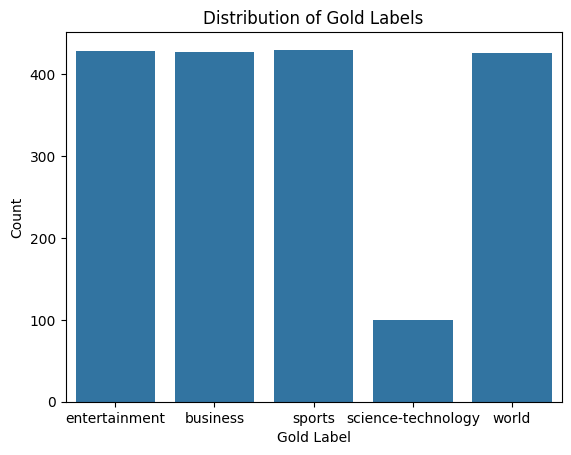

In [5]:
# Normalize labels to lowercase for consistency
combined_df['gold_label'] = combined_df['gold_label'].str.lower()

# Label distribution
print("Label Distribution:\n", combined_df['gold_label'].value_counts())

# Visualize label distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=combined_df, x='gold_label')
plt.title('Distribution of Gold Labels')
plt.xlabel('Gold Label')
plt.ylabel('Count')
plt.show()


**Length Analysis of content**:
Analyzing and visualizing the length of articles in content

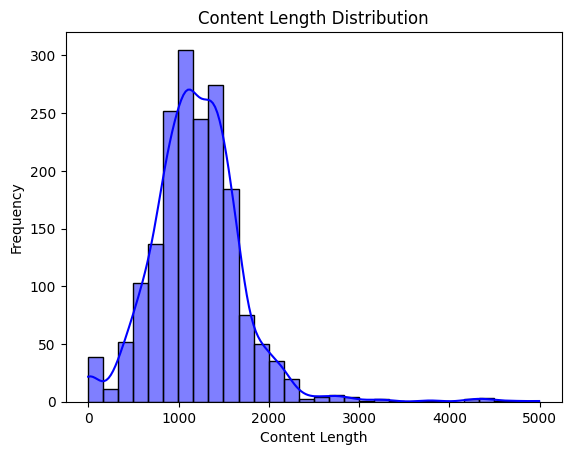

In [6]:
# Add a column for content length
combined_df['content'] = combined_df['content'].fillna('')
combined_df['content_length'] = combined_df['content'].apply(len)


# Plot distribution of content length
sns.histplot(combined_df['content_length'], bins=30, kde=True, color='blue')
plt.title('Content Length Distribution')
plt.xlabel('Content Length')
plt.ylabel('Frequency')
plt.show()


**Cleaning the content Text:** Preprocessing the content column to prepare it for further analysis

Removing punctuation and numbers.

Removing stopwords.

Tokenizing text.

In [97]:
# import re

# # Example stopword list (you can extend this list)
# from typing import FrozenSet

# # Urdu Language Stop words list
# STOP_WORDS: FrozenSet[str] = frozenset("""

#  آ آئی آئیں آئے آتا آتی آتے آس آمدید آنا آنسہ آنی آنے آپ آگے آہ آہا آیا اب ابھی ابے
#  ارے اس اسکا اسکی اسکے اسی اسے اف افوہ البتہ الف ان اندر انکا انکی انکے انہوں انہی انہیں اوئے اور اوپر
#  اوہو اپ اپنا اپنوں اپنی اپنے اپنےآپ اکثر اگر اگرچہ اہاہا ایسا ایسی ایسے ایک بائیں بار بارے بالکل باوجود باہر
#  بج بجے بخیر بشرطیکہ بعد بعض بغیر بلکہ بن بنا بناؤ بند بڑی بھر بھریں بھی بہت بہتر تاکہ تاہم تب تجھ
#  تجھی تجھے ترا تری تلک تم تمام تمہارا تمہاروں تمہاری تمہارے تمہیں تو تک تھا تھی تھیں تھے تیرا تیری تیرے
#  جا جاؤ جائیں جائے جاتا جاتی جاتے جانی جانے جب جبکہ جدھر جس جسے جن جناب جنہوں جنہیں جو جہاں جی جیسا
#  جیسوں جیسی جیسے حالانکہ حالاں حصہ حضرت خاطر خالی خواہ خوب خود دائیں درمیان دریں دو دوران دوسرا دوسروں دوسری دوں
#  دکھائیں دی دیئے دیا دیتا دیتی دیتے دیر دینا دینی دینے دیکھو دیں دیے دے ذریعے رکھا رکھتا رکھتی رکھتے رکھنا رکھنی
#  رکھنے رکھو رکھی رکھے رہ رہا رہتا رہتی رہتے رہنا رہنی رہنے رہو رہی رہیں رہے ساتھ سامنے ساڑھے سب سبھی
#  سراسر سمیت سوا سوائے سکا سکتا سکتے سہ سہی سی سے شاید شکریہ صاحب صاحبہ صرف ضرور طرح طرف طور علاوہ عین
#  فقط فلاں فی قبل قطا لئے لائی لائے لاتا لاتی لاتے لانا لانی لانے لایا لو لوجی لوگوں لگ لگا لگتا
#  لگتی لگی لگیں لگے لہذا لی لیا لیتا لیتی لیتے لیکن لیں لیے لے ماسوا مت مجھ مجھی مجھے محترم محترمہ محض
#  مرا مرحبا مری مرے مزید مس مسز مسٹر مطابق مل مکرمی مگر مگھر مہربانی میرا میروں میری میرے میں نا نزدیک
#  نما نہ نہیں نیز نیچے نے و وار واسطے واقعی والا والوں والی والے واہ وجہ ورنہ وغیرہ ولے وگرنہ وہ وہاں
#  وہی وہیں ویسا ویسے ویں پاس پایا پر پس پلیز پون پونی پونے پھر پہ پہلا پہلی پہلے پیر پیچھے چاہئے
#  چاہتے چاہیئے چاہے چلا چلو چلیں چلے چناچہ چند چونکہ چکی چکیں چکے ڈالنا ڈالنی ڈالنے ڈالے کئے کا کاش کب کبھی
#  کدھر کر کرتا کرتی کرتے کرم کرنا کرنے کرو کریں کرے کس کسی کسے کم کن کنہیں کو کوئی کون کونسا
#  کونسے کچھ کہ کہا کہاں کہہ کہی کہیں کہے کی کیا کیسا کیسے کیونکر کیونکہ کیوں کیے کے گئی گئے گا گنا
#  گو گویا گی گیا ہائیں ہائے ہاں ہر ہرچند ہرگز ہم ہمارا ہماری ہمارے ہمی ہمیں ہو ہوئی ہوئیں ہوئے ہوا
#  ہوبہو ہوتا ہوتی ہوتیں ہوتے ہونا ہونگے ہونی ہونے ہوں ہی ہیلو ہیں ہے یا یات یعنی یک یہ یہاں یہی یہیں

# """.split())


# def remove_stopwords(text: str) -> str:
#     """
#     Remove STOP_WORDS from `text`.

#     Args:
#         text (str): Urdu text
#     Returns:
#         str: ``str`` object with stop words removed
#     """
#     return " ".join(word for word in text.split() if word not in STOP_WORDS)


# combined_df['cleaned_content'] = combined_df['content'].apply(remove_stopwords)

# print(combined_df[['content', 'cleaned_content']].head())
import re
import string

stopwords=[]
with open(r'D:\Fall Semester 2024\CS 438\Model 1\stopwords-ur.txt',encoding='utf-8') as f:
    lines = f.readlines()
    for line in lines:
      stopwords.append(line.strip('\n'))

# Urdu and English digits
urdu_digits = ['۶', '۴', '۵', '۸', '۲', '۰', '۷', '۹', '۳', '۱']
english_digits = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0']

# Urdu diacritics
urdu_diacritics = ['ِ', 'ٰ', 'ُ', 'ٍ', 'ً', 'َ']

# Step 2: Define the preprocessing function
def preprocess_text(text):
    # Step 2.1: Remove digits (both Urdu and English)
    for digit in urdu_digits + english_digits:
        text = text.replace(digit, '')

    # Step 2.2: Remove diacritics
    for diacritic in urdu_diacritics:
        text = text.replace(diacritic, '')

    # Step 2.3: Remove special characters (punctuation)
    text = re.sub(r'[؛۔٫٪+=@#!؟،۔)(}{]', '', text)

    # remove English words
    text = re.sub(r'\b[a-zA-Z]+\b', '', text)
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Step 2.6: Remove stopwords
    words = text.split()
    cleaned_words = [word for word in words if word not in stopwords and word != '']
    text = ' '.join(cleaned_words)

    return text

# Step 3: Apply the preprocessing function to the DataFrame
combined_df['cleaned_content'] = combined_df['content'].apply(preprocess_text)

# Step 4: Display the results
print(combined_df[['content', 'cleaned_content']].head())

                                             content  \
0  مشہور پاکستانی لوک گلوکار عطا اللّٰہ عیسیٰ خیل...   
1  ہندوستان ٹائمز لیڈرشپ سمٹ 2024 میں بالی وڈ کے ...   
2  گورنر سندھ کامران خان ٹیسوری کی ہدایت پر 10 فن...   
3  معروف بالی وڈ اداکار عامر خان نے حالیہ انٹرویو...   
4  معروف پنجابی گلوکار اور اداکار دلجیت دوسانجھ ن...   

                                     cleaned_content  
0  مشہور پاکستانی لوک گلوکار عطا اللّہ عیسی خیلوی...  
1  ہندوستان ٹائمز لیڈرشپ سمٹ میں بالی وڈ سپر اسٹا...  
2  گورنر سندھ کامران خان ٹیسوری ہدایت فنکاروں میں...  
3  معروف بالی وڈ اداکار عامر خان نے حالیہ انٹرویو...  
4  معروف پنجابی گلوکار اداکار دلجیت دوسانجھ نے حا...  


**Explore Content Length and Outliers**

Content length analysis helps identify articles that may be too short or too long, potentially indicating outliers or issues in the scraping process.

In [98]:
# Check for outliers in content length
Q1 = combined_df['content_length'].quantile(0.25)
Q3 = combined_df['content_length'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers in content length
combined_df = combined_df[(combined_df['content_length'] >= lower_bound) & (combined_df['content_length'] <= upper_bound)]

# Check the shape after removing outliers
print("Shape of DataFrame after removing outliers:", combined_df.shape)


Shape of DataFrame after removing outliers: (1742, 7)


**Word Frequency**

After cleaning the content, we can analyze the most frequent words in the dataset using a word cloud:


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


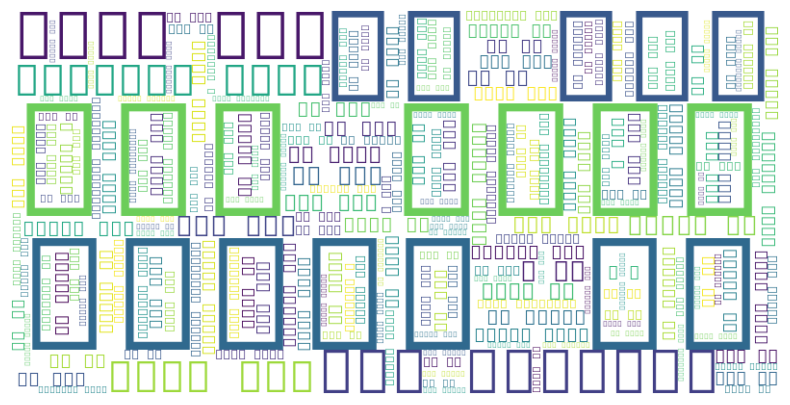

In [33]:
!pip install wordcloud
from wordcloud import WordCloud

# Generate a word cloud for the cleaned content
text = ' '.join(combined_df['cleaned_content'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


**Relationships and Correlations**

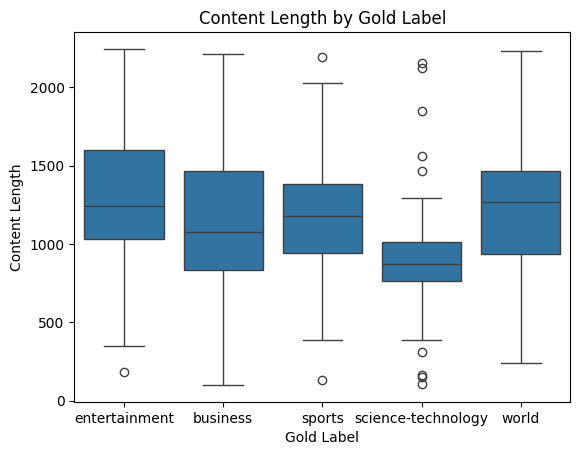

In [99]:
sns.boxplot(data=combined_df, x='gold_label', y='content_length')
plt.title('Content Length by Gold Label')
plt.xlabel('Gold Label')
plt.ylabel('Content Length')
plt.show()


**Save Cleaned Dataset**

In [100]:
combined_df.to_csv('cleaned_combined_articles.csv', index=False, encoding='utf-8-sig')
print("Cleaned dataset saved as 'cleaned_combined_articles.csv'")


Cleaned dataset saved as 'cleaned_combined_articles.csv'


In [5]:
import pandas as pd
import numpy as np
df1 = pd.read_csv(r'D:\Fall Semester 2024\CS 438\Model 1\scraping_with_EDA\scraping.ipynb\cleaned_combined_articles.csv')

texts = df1['cleaned_content']
labels = df1['gold_label']

# tokenization
def preprocess(text):
    return text.split()

processed_texts = texts.apply(preprocess)

#add each word to the vocabulary. 
vocabulary = set()
for text in processed_texts:
    for word in text:
        vocabulary.add(word)

# vocab_to_index = {word: i for i, word in enumerate(vocabulary)}
vocab_to_index = {}
index = 0
for word in vocabulary:
    vocab_to_index[word] = index
    index += 1

def encode_text(text):
    vector = np.zeros(len(vocabulary))
    for word in text:
        if word in vocab_to_index:
            vector[vocab_to_index[word]] += 1
    return vector

#storing the frequencies of each word in X array
X = np.array([encode_text(text) for text in processed_texts])
y = labels.values


def train_test_split(X, y, test_size=0.2, random_state=30):
    np.random.seed(random_state)
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    split_i = int(len(X) * (1 - test_size))
    train_indices= indices[:split_i]
    test_indices = indices[split_i:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

class NaiveBayesClassifier:
    def __init__(self):
        self.class_probs = {}
        self.feature_probs = {}

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # count the occurrences of each class in y
        class_counts = {}
        for label in y:
            if label in class_counts:
                class_counts[label] += 1
            else:
                class_counts[label] = 1

        #calculate class probabilities (P(class))
        class_probs = {}
        for c, count in class_counts.items():
            prob = count / n_samples
            class_probs[c] = prob
        self.class_probs = class_probs

        self.feature_probs = {c: np.zeros(n_features) for c in class_counts}
        for c in class_counts:
            X_c = X[y == c]  
            feature_sums = np.sum(X_c, axis=0) + 1  
            self.feature_probs[c] = feature_sums / feature_sums.sum()

    def predict(self, X):
        predictions = []
        for x in X:
            class_scores = {}
            for c in self.class_probs:
                log_prob = np.log(self.class_probs[c])
                log_prob += np.sum(np.log(self.feature_probs[c]) * x)
                class_scores[c] = log_prob
            predictions.append(max(class_scores, key=class_scores.get))
        return np.array(predictions)

nb_model = NaiveBayesClassifier()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

# Accuracy
def accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    return correct_predictions / len(y_true)

# Precision
def precision(y_true, y_pred, classes):
    precisions = {}
    for cls in classes:
        tp = np.sum((y_pred == cls) & (y_true == cls))  # True positives
        fp_tp = np.sum(y_pred == cls)                  # Predicted positives
        precisions[cls] = tp / fp_tp if fp_tp > 0 else 0
    return precisions

# Recall
def recall(y_true, y_pred, classes):
    recalls = {}
    for cls in classes:
        tp = np.sum((y_pred == cls) & (y_true == cls))  # True positives
        fn_tp = np.sum(y_true == cls)                  # Actual positives
        recalls[cls] = tp / fn_tp if fn_tp > 0 else 0
    return recalls

# F1 Score
def f1_score(precisions, recalls, classes):
    f1_scores = {}
    for cls in classes:
        precision_cls = precisions[cls]
        recall_cls = recalls[cls]
        f1_scores[cls] = (
            2 * (precision_cls * recall_cls) / (precision_cls + recall_cls)
            if (precision_cls + recall_cls) > 0
            else 0
        )
    return f1_scores

classes = np.unique(y_train)
precisions = precision(y_test, y_pred, classes)
recalls = recall(y_test, y_pred, classes)
f1_scores = f1_score(precisions, recalls, classes)

print("Accuracy:", accuracy(y_test, y_pred))
print("Precision per class:", precisions)
print("Recall per class:", recalls)
print("F1 Score per class:", f1_scores)

# Find misclassified samples
# Find misclassified samples
misclassified_indices = np.where(y_pred != y_test)[0]

# Print out misclassified samples
for index in misclassified_indices:
    print(f"Text: {texts.iloc[index]}")  # pandas Series indexing
    print(f"True Label: {y_test[index]}")  # NumPy array indexing
    print(f"Predicted Label: {y_pred[index]}")  # NumPy array indexing
    print("-" * 50)  # separator for better readability

from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)
def misclassification_rate(y_true, y_pred, classes):
    misclassification_rates = {}
    for cls in classes:
        total = np.sum(y_true == cls)  # Total samples of this class
        misclassified = np.sum((y_pred != y_true) & (y_true == cls))  # Misclassified samples of this class
        misclassification_rates[cls] = misclassified / total if total > 0 else 0
    return misclassification_rates

misclassification_rates = misclassification_rate(y_test, y_pred, classes)
print("Misclassification Rate per class:", misclassification_rates)


Accuracy: 0.9828080229226361
Precision per class: {'business': 0.9873417721518988, 'entertainment': 1.0, 'science-technology': 0.8461538461538461, 'sports': 0.9772727272727273, 'world': 0.9866666666666667}
Recall per class: {'business': 0.9629629629629629, 'entertainment': 0.9894736842105263, 'science-technology': 1.0, 'sports': 1.0, 'world': 0.9736842105263158}
F1 Score per class: {'business': 0.975, 'entertainment': 0.9947089947089947, 'science-technology': 0.9166666666666666, 'sports': 0.9885057471264368, 'world': 0.9801324503311258}
Text: مشہور اداکارہ ملائکہ اروڑا حال میں والد انتقال بعد دوبارہ اپنے کام میں مشغول انہوں نے والد وفات بعد کچھ وقت وقفہ لیا اپنی فیملی ساتھ وقت گزارا اپنی ویں سالگرہ بھی انہوں نے سادگی سے منائی اب ملائکہ اپنے مختلف پروجیکٹس کام کر جن میں مختلف برانڈز اشتہارات ڈانس رئیلٹی شو جج بننا اسٹارٹ اپ شو میں بطور بزنس انویسٹر شامل ہونا بھی شامل اداکارہ نے اپنی زندگی میں مشکل حالات کا سامنا کیا جیسے طلاق آن لائن تنقید حالیہ ذاتی نقصان انہوں نے اپنے والد یاد میں خاص

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import pyplot as plt
from gensim.models.keyedvectors import KeyedVectors

# Load Data
df1 = pd.read_csv(r'D:\Fall Semester 2024\CS 438\Model 1\scraping_with_EDA\scraping.ipynb\cleaned_combined_articles.csv')
texts = df1['cleaned_content']
labels = df1['gold_label']

# Tokenization (splitting the cleaned text)
def preprocess_for_tokenization(var):
    return var.split()

processed_texts = df1['cleaned_content'].apply(preprocess_for_tokenization)

# Load Pre-trained Word Embeddings (FastText for Urdu)
embedding_model = KeyedVectors.load_word2vec_format('cc.ur.300.vec', binary=False)  # Path to FastText Urdu embeddings

# Convert Text to Word Embeddings (average word vectors for each document)
def preprocess_with_embeddings(text, embedding_model):
    tokens = text.split()
    word_vectors = []
    for token in tokens:
        if token in embedding_model:
            word_vectors.append(embedding_model[token])
        else:
            word_vectors.append(np.zeros(embedding_model.vector_size))  # Use zero vector if the word is not in the embedding
    if word_vectors:
        return np.mean(word_vectors, axis=0)  # Averaging the word vectors to get a document-level embedding
    else:
        return np.zeros(embedding_model.vector_size)  # Return zero vector if no valid words

# Apply word embedding conversion to all texts
processed_embeddings = df1['cleaned_content'].apply(lambda x: preprocess_with_embeddings(x, embedding_model))

# Convert the embeddings to a NumPy array for model input
X_embeddings = np.array(processed_embeddings.tolist())

# Encode labels into numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# Convert to PyTorch Tensors
X_tensor = torch.tensor(X_embeddings, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)


# Train-Test Split Function
def train_test_split(X, y, test_size=0.2, random_state=42):
    np.random.seed(random_state)
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    split_i = int(len(X) * (1 - test_size))
    train_indices= indices[:split_i]
    test_indices = indices[split_i:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_embeddings, y, test_size=0.2)


# Neural Network Architecture
class NN_Classification_Texts(nn.Module):
    def _init_(self, input_size, hidden_size, output_size):
        super(NN_Classification_Texts, self)._init_()
        self.hidden1 = nn.Linear(input_size, hidden_size)  # 1st hidden layer
        self.hidden2 = nn.Linear(hidden_size, hidden_size)  # 2nd hidden layer
        self.output = nn.Linear(hidden_size, output_size)   # output layer

    def forward(self, x):  # forward pass
        x = torch.relu(self.hidden1(x))  # ReLU after 1st hidden layer
        x = torch.relu(self.hidden2(x))  # ReLU after 2nd hidden layer
        x = self.output(x)               # output layer
        return x


# Hyperparameters
input_size = X_train.shape[1]  # feature number (dimension of word embeddings, e.g., 300 for FastText)
hidden_size = 128  
output_size = len(np.unique(y))  # number of unique labels

# Instantiate the model
model = NN_Classification_Texts(input_size, hidden_size, output_size)

# Loss and Optimizer
ce_loss = nn.CrossEntropyLoss()  # For multiclass classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  

# Training Hyperparameters
epochs = 50
batch_size = 32
losses = []

for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for i in range(0, len(X_train), batch_size):
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]
        X_batch_tensor = torch.tensor(X_batch, dtype=torch.float32)
        y_batch_tensor = torch.tensor(y_batch, dtype=torch.long)
        
        optimizer.zero_grad()
        outputs = model(X_batch_tensor)
        loss = ce_loss(outputs, y_batch_tensor)
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()

    # Average loss for the epoch
    avg_loss = epoch_loss / (len(X_train) // batch_size)
    losses.append(avg_loss)
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")

# Plot the loss curve
plt.plot(range(1, epochs + 1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

# Model evaluation
model.eval()
with torch.no_grad():
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    outputs = model(X_test_tensor)
    _, pred = torch.max(outputs, 1)

    # Calculate accuracy
    tp_tn = (pred == torch.tensor(y_test)).sum().item()
    accuracy = tp_tn / len(y_test) * 100
    print(f"Test Accuracy: {accuracy:.2f}%")

    # Classification Report and Confusion Matrix
    print("\nClassification Report:")
    print(classification_report(y_test, pred.numpy(), target_names=label_encoder.classes_))

    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, pred.numpy())
    print(cm)

FileNotFoundError: [Errno 2] No such file or directory: 'cc.ur.300.vec'

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from gensim.models.keyedvectors import KeyedVectors

# Load Data
df1 = pd.read_csv(r'D:\Fall Semester 2024\CS 438\Model 1\scraping_with_EDA\scraping.ipynb\cleaned_combined_articles.csv')
texts = df1['cleaned_content']
labels = df1['gold_label']

# Tokenization (splitting the cleaned text)
def preprocess_for_tokenization(var):
    return var.split()

processed_texts = df1['cleaned_content'].apply(preprocess_for_tokenization)

# Load Pre-trained Word Embeddings (FastText for Urdu)
embedding_model = KeyedVectors.load_word2vec_format('cc.ur.300.vec', binary=False)  # Path to FastText Urdu embeddings

# Convert Text to Word Embeddings (average word vectors for each document)
def preprocess_with_embeddings(text, embedding_model):
    tokens = text.split()
    word_vectors = []
    for token in tokens:
        if token in embedding_model:
            word_vectors.append(embedding_model[token])
        else:
            word_vectors.append(np.zeros(embedding_model.vector_size))  # Use zero vector if the word is not in the embedding
    if word_vectors:
        return np.mean(word_vectors, axis=0)  # Averaging the word vectors to get a document-level embedding
    else:
        return np.zeros(embedding_model.vector_size)  # Return zero vector if no valid words

# Apply word embedding conversion to all texts
processed_embeddings = df1['cleaned_content'].apply(lambda x: preprocess_with_embeddings(x, embedding_model))

# Convert the embeddings to a NumPy array for model input
X_embeddings = np.array(processed_embeddings.tolist())

# Encode labels into numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# Convert to PyTorch Tensors
X_tensor = torch.tensor(X_embeddings, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)


# Train-Test Split Function
def train_test_split(X, y, test_size=0.2, random_state=42):
    np.random.seed(random_state)
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    split_i = int(len(X) * (1 - test_size))
    train_indices= indices[:split_i]
    test_indices = indices[split_i:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_embeddings, y, test_size=0.2)


# Neural Network Architecture
class NN_Classification_Texts(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NN_Classification_Texts, self).__init__()
        self.hidden1 = nn.Linear(input_size, hidden_size)  # 1st hidden layer
        self.hidden2 = nn.Linear(hidden_size, hidden_size)  # 2nd hidden layer
        self.output = nn.Linear(hidden_size, output_size)   # output layer

    def forward(self, x):  # forward pass
        x = torch.relu(self.hidden1(x))  # ReLU after 1st hidden layer
        x = torch.relu(self.hidden2(x))  # ReLU after 2nd hidden layer
        x = self.output(x)               # output layer
        return x


# Hyperparameters
input_size = X_train.shape[1]  # feature number (dimension of word embeddings, e.g., 300 for FastText)
hidden_size = 128  
output_size = len(np.unique(y))  # number of unique labels

# Instantiate the model
model = NN_Classification_Texts(input_size, hidden_size, output_size)

# Loss and Optimizer
ce_loss = nn.CrossEntropyLoss()  # For multiclass classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  

# Training Hyperparameters
epochs = 50
batch_size = 32

# Training Loop
for epoch in range(epochs):
    model.train()  # Set model to training mode
    for i in range(0, len(X_train), batch_size):
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]
        
        X_batch_tensor = torch.tensor(X_batch, dtype=torch.float32)
        y_batch_tensor = torch.tensor(y_batch, dtype=torch.long)
        
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(X_batch_tensor)
        loss = ce_loss(outputs, y_batch_tensor)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
    
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Evaluation
model.eval()  # Set model to evaluation mode

with torch.no_grad():
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)  # Convert to tensor
    outputs = model(X_test_tensor)  # Forward pass
    _, pred = torch.max(outputs, 1)  # Get predicted labels

    tp_tn = (pred == y_test).sum().item()  # Calculate accuracy
    accuracy = tp_tn / len(y_test) * 100
    print(f"Test Accuracy: {accuracy:.2f}%")


FileNotFoundError: [Errno 2] No such file or directory: 'cc.ur.300.vec'